Acknowledgments


*   https://www.udemy.com/course/pytorch-for-deep-learning-with-python-bootcamp/
*   https://archive.ics.uci.edu/ml/datasets/iris


*   https://pytorch.org/
*   Activation Function Info -[Link](https://www.geeksforgeeks.org/activation-functions-neural-networks/#:~:text=The%20purpose%20of%20the%20activation,the%20output%20of%20a%20neuron.&text=We%20know%2C%20neural%20network%20has,and%20their%20respective%20activation%20function.)










In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)
  
  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    
    return(x)

In [3]:
torch.manual_seed(32)
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('/content/iris.csv')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


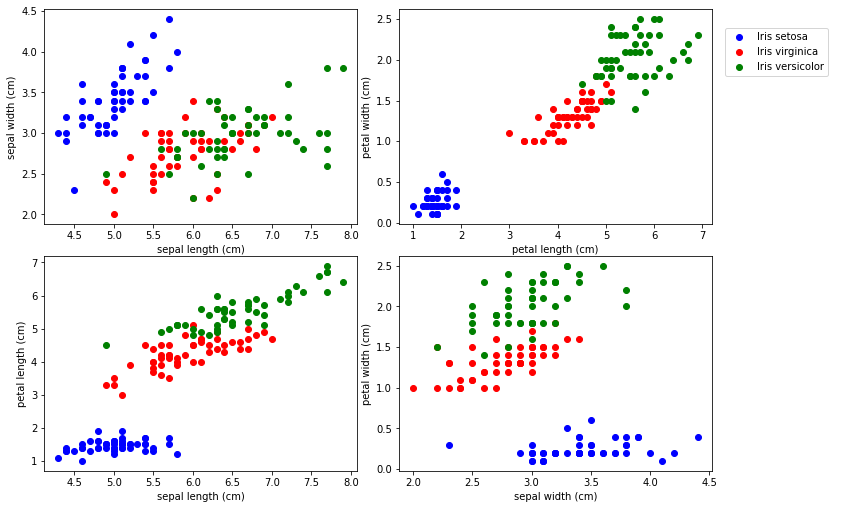

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots  = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b','r','g']
labels = ['Iris setosa', 'Iris virginica', 'Iris versicolor']

for i, ax in enumerate(axes.flat):
  for j in range(3):
    x = data.columns[plots[i][0]]
    y = data.columns[plots[i][1]]

    ax.scatter(data[data['target']==j][x], 
               data[data['target']==j][y],
               color=colors[j])
    ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0, 0.85))
plt.show()


In [8]:
X = data.drop('target', axis=1)
y = data['target']

In [9]:
type(y)

pandas.core.series.Series

In [10]:
X = X.values
y = y.values

In [11]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 33)

In [14]:
X_train = torch.FloatTensor(X_train)
X_test  = torch.FloatTensor(X_test)

In [15]:
X_test[0:5]

tensor([[5.7000, 2.9000, 4.2000, 1.3000],
        [6.7000, 3.1000, 4.4000, 1.4000],
        [4.7000, 3.2000, 1.6000, 0.2000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [6.1000, 2.6000, 5.6000, 1.4000]])

In [16]:
y_train = torch.LongTensor(y_train)

In [17]:
y_test = torch.LongTensor(y_test)

In [18]:

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [19]:
model.parameters()

<generator object Module.parameters at 0x7f31d0ccabf8>

In [20]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [21]:
epochs = 100
losses = []

for i in range(epochs):

  # Run Forward and get a prediction
  y_pred = model.forward(X_train)

  # Calculate the loss/error
  loss = criterion(y_pred,y_train)

  losses.append(loss)

  if i%10==0:
    print(f'Epoch {i} and loss is:{loss}')
  
  # BackPropagation

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 and loss is:1.1507115364074707
Epoch 10 and loss is:0.9377315044403076
Epoch 20 and loss is:0.779825747013092
Epoch 30 and loss is:0.6099401116371155
Epoch 40 and loss is:0.40079930424690247
Epoch 50 and loss is:0.25436317920684814
Epoch 60 and loss is:0.15053054690361023
Epoch 70 and loss is:0.10086944699287415
Epoch 80 and loss is:0.08128310739994049
Epoch 90 and loss is:0.07231426984071732


Text(0.5, 0, 'Epoch')

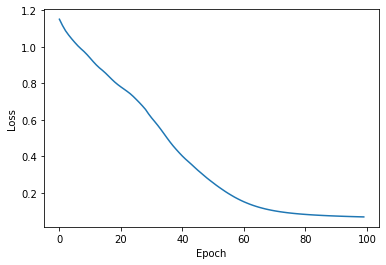

In [22]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [23]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss   = criterion(y_eval, y_test)

In [24]:
loss

tensor(0.0581)

In [25]:
correct = 0

with torch.no_grad():
  for i, data in enumerate(X_test):

    y_val = model.forward(data)
    print(f'{i+1}.) {str(y_val)} {y_test[i]}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} results')

1.) tensor([-2.1252,  4.8064, -0.8628]) 1
2.) tensor([-1.7985,  5.3098, -1.5449]) 1
3.) tensor([  6.3542,   0.8438, -10.0541]) 0
4.) tensor([-3.9123,  4.5958,  1.1693]) 1
5.) tensor([-7.4713,  3.2021,  5.7853]) 2
6.) tensor([-10.4976,   1.6459,   9.6297]) 2
7.) tensor([  6.3201,   0.9917, -10.1532]) 0
8.) tensor([  7.0468,   0.7059, -10.9137]) 0
9.) tensor([-7.2061,  3.3477,  5.3565]) 2
10.) tensor([-9.3960,  2.5759,  8.1033]) 2
11.) tensor([-9.8807,  2.3475,  8.7141]) 2
12.) tensor([ 6.2748,  0.6655, -9.7613]) 0
13.) tensor([-9.3142,  2.1880,  8.1947]) 2
14.) tensor([-3.7803,  4.5050,  1.0752]) 1
15.) tensor([-7.8657,  3.0117,  6.2303]) 2
16.) tensor([-1.8867,  5.1572, -1.3345]) 1
17.) tensor([-5.7006,  3.5030,  3.6696]) 2
18.) tensor([  7.1789,   0.7369, -11.1350]) 0
19.) tensor([-3.2944,  4.7931,  0.3475]) 1
20.) tensor([-7.7665,  3.7629,  5.7095]) 2
21.) tensor([  6.6499,   0.7889, -10.4252]) 0
22.) tensor([  7.4357,   0.8918, -11.6600]) 0
23.) tensor([-9.7584,  2.1744,  8.6654]) 2

In [26]:
correct = 0

with torch.no_grad():
  for i, data in enumerate(X_test):

    y_val = model.forward(data)
    print(f'{i+1}.) {y_val.argmax().item()} {y_test[i]}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} results')

1.) 1 1
2.) 1 1
3.) 0 0
4.) 1 1
5.) 2 2
6.) 2 2
7.) 0 0
8.) 0 0
9.) 2 2
10.) 2 2
11.) 2 2
12.) 0 0
13.) 2 2
14.) 1 1
15.) 2 2
16.) 1 1
17.) 2 2
18.) 0 0
19.) 1 1
20.) 2 2
21.) 0 0
22.) 0 0
23.) 2 2
24.) 0 0
25.) 2 2
26.) 2 2
27.) 1 1
28.) 1 1
29.) 2 2
30.) 2 2
We got 30 results


In [27]:
torch.save(model.state_dict(), 'my_iris_model')

In [28]:
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model'))

<All keys matched successfully>

In [29]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [38]:
with torch.no_grad():
    y_val = new_model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.05809898


In [30]:
unknown_flower = torch.tensor([5.2,3.3,2.6,0.8])

In [36]:
data = pd.read_csv('/content/iris.csv')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


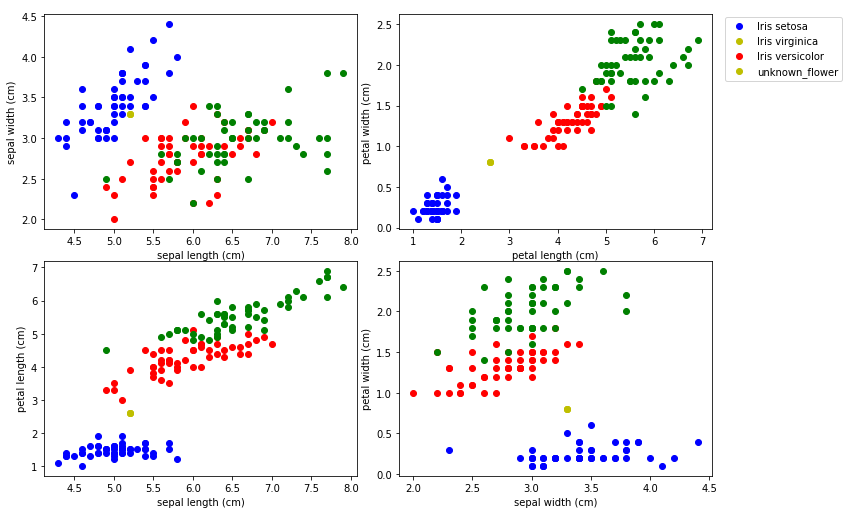

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots  = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b','r','g']
labels = ['Iris setosa', 'Iris virginica', 'Iris versicolor','unknown_flower']

for i, ax in enumerate(axes.flat):
  for j in range(3):
    x = data.columns[plots[i][0]]
    y = data.columns[plots[i][1]]

    ax.scatter(data[data['target']==j][x], 
               data[data['target']==j][y],
               color=colors[j])
    ax.set(xlabel=x, ylabel=y)
    # Add a plot for our mystery iris:
    ax.scatter(unknown_flower[plots[i][0]],unknown_flower[plots[i][1]], color='y')
    
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0, 0.85))
plt.show()


In [ ]:
with torch.no_grad():
    y_val = new_model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

In [39]:
with torch.no_grad():
  print(new_model(unknown_flower))
  print(new_model(unknown_flower).argmax())

tensor([ 3.4284,  2.5414, -6.9107])
tensor(0)
